In [1]:
#basic statistical analysis
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import folium
import calmap

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head()

Province/State Country/Region      Lat      Long     Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000  1/22/20        2.0   
1            NaN          Japan  36.0000  138.0000  1/22/20        2.0   
2            NaN      Singapore   1.2833  103.8333  1/22/20        0.0   
3            NaN          Nepal  28.1667   84.2500  1/22/20        0.0   
4            NaN       Malaysia   2.5000  112.5000  1/22/20        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [3]:
df.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)
df.tail()

Country/Region     Date  Confirmed  Deaths  Recovered
19215                 Jersey  3/23/20        0.0     0.0        0.0
19216            Puerto Rico  3/23/20        0.0     1.0        0.0
19217  Republic of the Congo  3/23/20        0.0     0.0        0.0
19218            The Bahamas  3/23/20        0.0     0.0        0.0
19219             The Gambia  3/23/20        0.0     0.0        0.0

In [4]:
df_latest = df[df['Date'] == max(df['Date'])].reset_index()
df_latest.tail()

index         Country/Region    Date  Confirmed  Deaths  Recovered
305  14875                 Jersey  3/9/20        0.0     0.0        0.0
306  14876            Puerto Rico  3/9/20        0.0     0.0        0.0
307  14877  Republic of the Congo  3/9/20        0.0     0.0        0.0
308  14878            The Bahamas  3/9/20        0.0     0.0        0.0
309  14879             The Gambia  3/9/20        0.0     0.0        0.0

In [5]:
full_table = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'])
full_table.tail()

Province/State         Country/Region      Lat    Long       Date  \
19215            NaN                 Jersey  49.1900  -2.110 2020-03-23   
19216            NaN            Puerto Rico  18.2000 -66.500 2020-03-23   
19217            NaN  Republic of the Congo  -1.4400  15.556 2020-03-23   
19218            NaN            The Bahamas  24.2500 -76.000 2020-03-23   
19219            NaN             The Gambia  13.4667 -16.600 2020-03-23   

       Confirmed  Deaths  Recovered  
19215        0.0     0.0        0.0  
19216        0.0     1.0        0.0  
19217        0.0     0.0        0.0  
19218        0.0     0.0        0.0  
19219        0.0     0.0        0.0

In [6]:
full_table.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)
full_table.tail()

Country/Region       Date  Confirmed  Deaths  Recovered
19215                 Jersey 2020-03-23        0.0     0.0        0.0
19216            Puerto Rico 2020-03-23        0.0     1.0        0.0
19217  Republic of the Congo 2020-03-23        0.0     0.0        0.0
19218            The Bahamas 2020-03-23        0.0     0.0        0.0
19219             The Gambia 2020-03-23        0.0     0.0        0.0

In [7]:
df = full_table
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df.tail()

Country/Region       Date  Confirmed  Deaths  Recovered  Active
19215                 Jersey 2020-03-23        0.0     0.0        0.0     0.0
19216            Puerto Rico 2020-03-23        0.0     1.0        0.0    -1.0
19217  Republic of the Congo 2020-03-23        0.0     0.0        0.0     0.0
19218            The Bahamas 2020-03-23        0.0     0.0        0.0     0.0
19219             The Gambia 2020-03-23        0.0     0.0        0.0     0.0

In [8]:
df = df[df['Date'] == max(df['Date'])].reset_index()
df.tail()

index         Country/Region       Date  Confirmed  Deaths  Recovered  \
305  19215                 Jersey 2020-03-23        0.0     0.0        0.0   
306  19216            Puerto Rico 2020-03-23        0.0     1.0        0.0   
307  19217  Republic of the Congo 2020-03-23        0.0     0.0        0.0   
308  19218            The Bahamas 2020-03-23        0.0     0.0        0.0   
309  19219             The Gambia 2020-03-23        0.0     0.0        0.0   

     Active  
305     0.0  
306    -1.0  
307     0.0  
308     0.0  
309     0.0

In [9]:
df_grouped = df.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
df_grouped.tail()

Country/Region  Confirmed  Deaths  Recovered  Active
178     Uzbekistan       43.0     0.0        0.0    43.0
179      Venezuela       70.0     0.0       15.0    55.0
180        Vietnam      113.0     0.0       17.0    96.0
181         Zambia        3.0     0.0        0.0     3.0
182       Zimbabwe        3.0     0.0        0.0     3.0

In [10]:
df.head()

index Country/Region       Date  Confirmed  Deaths  Recovered  Active
0  18910       Thailand 2020-03-23      599.0     1.0       44.0   554.0
1  18911          Japan 2020-03-23     1086.0    40.0      235.0   811.0
2  18912      Singapore 2020-03-23      455.0     2.0      144.0   309.0
3  18913          Nepal 2020-03-23        2.0     0.0        1.0     1.0
4  18914       Malaysia 2020-03-23     1306.0    10.0      139.0  1157.0

In [11]:
df_grouped.head()

Country/Region  Confirmed  Deaths  Recovered  Active
0    Afghanistan       40.0     1.0        1.0    38.0
1        Albania       89.0     2.0        2.0    85.0
2        Algeria      201.0    17.0       65.0   119.0
3        Andorra      113.0     1.0        1.0   111.0
4         Angola        2.0     0.0        0.0     2.0

In [12]:
overall = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
overall.head()

Date  Confirmed   Deaths  Recovered    Active
0 2020-03-23   336004.0  14643.0    98334.0  223027.0

In [13]:
overall.style.background_gradient('Pastel1')

In [16]:
import plotly.express as px
temp = overall.melt(id_vars = 'Date', value_vars = ['Active', 'Deaths', 'Recovered'])
fig = px.treemap(temp, path = ["variable"], values = "value", height = 300, width = 500, color_discrete_sequence = [rec, act, dth])
fig.show()

Scenario of Global Level of Novel Corona Virus (SARS-CoV 2)

In [17]:
df_ordered = df_grouped.sort_values(by = 'Confirmed', ascending = False)
df_ordered.head()

Country/Region  Confirmed  Deaths  Recovered   Active
33           China    81439.0  3274.0    72814.0   5351.0
86           Italy    59138.0  5476.0     7024.0  46638.0
172             US    33276.0   417.0      178.0  32681.0
155          Spain    28768.0  1772.0     2575.0  24421.0
64         Germany    24873.0    94.0      266.0  24513.0

In [18]:
df_ordered = df_ordered.reset_index(drop = True)
df_ordered.head()

Country/Region  Confirmed  Deaths  Recovered   Active
0          China    81439.0  3274.0    72814.0   5351.0
1          Italy    59138.0  5476.0     7024.0  46638.0
2             US    33276.0   417.0      178.0  32681.0
3          Spain    28768.0  1772.0     2575.0  24421.0
4        Germany    24873.0    94.0      266.0  24513.0

In [19]:
df_ordered.style.background_gradient(cmap = 'Reds')

## GRAPHS

In [20]:
grp = df_ordered.groupby('Country/Region')
active = grp['Active'].agg(np.sum)
deaths = grp['Deaths'].agg(np.sum)
recovered = grp['Recovered'].agg(np.sum)

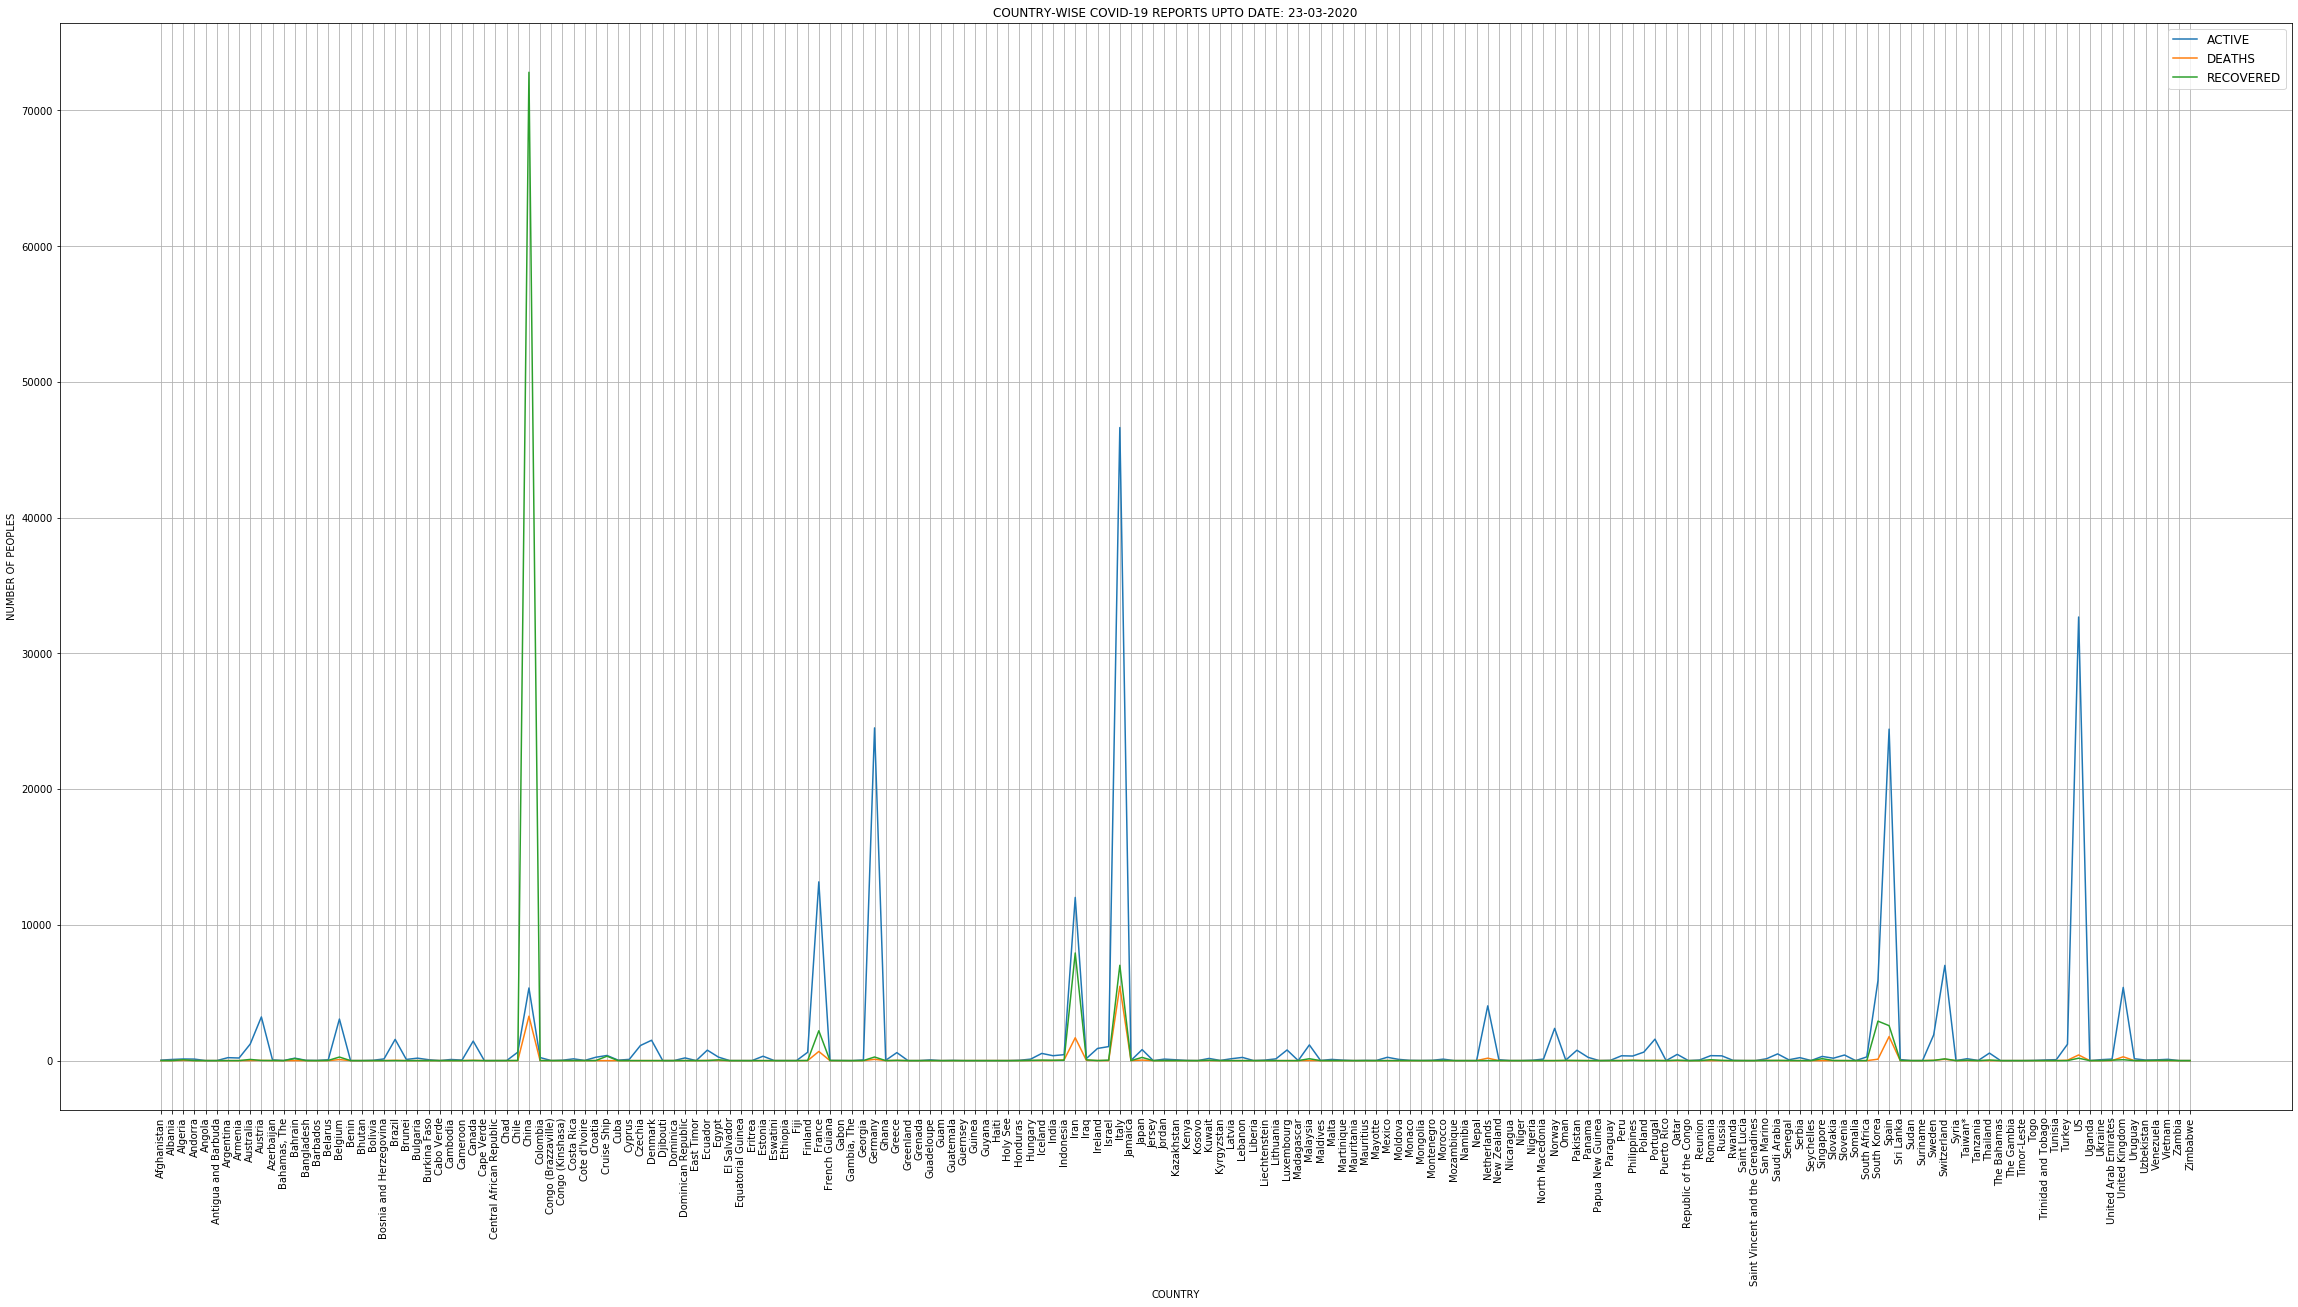

In [21]:
plt.figure(figsize = (40, 20))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLES')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(active, label = 'ACTIVE')
plt.plot(deaths, label = 'DEATHS')
plt.plot(recovered, label = 'RECOVERED')

plt.legend(loc = 'best', fontsize = 'large')
plt.grid()

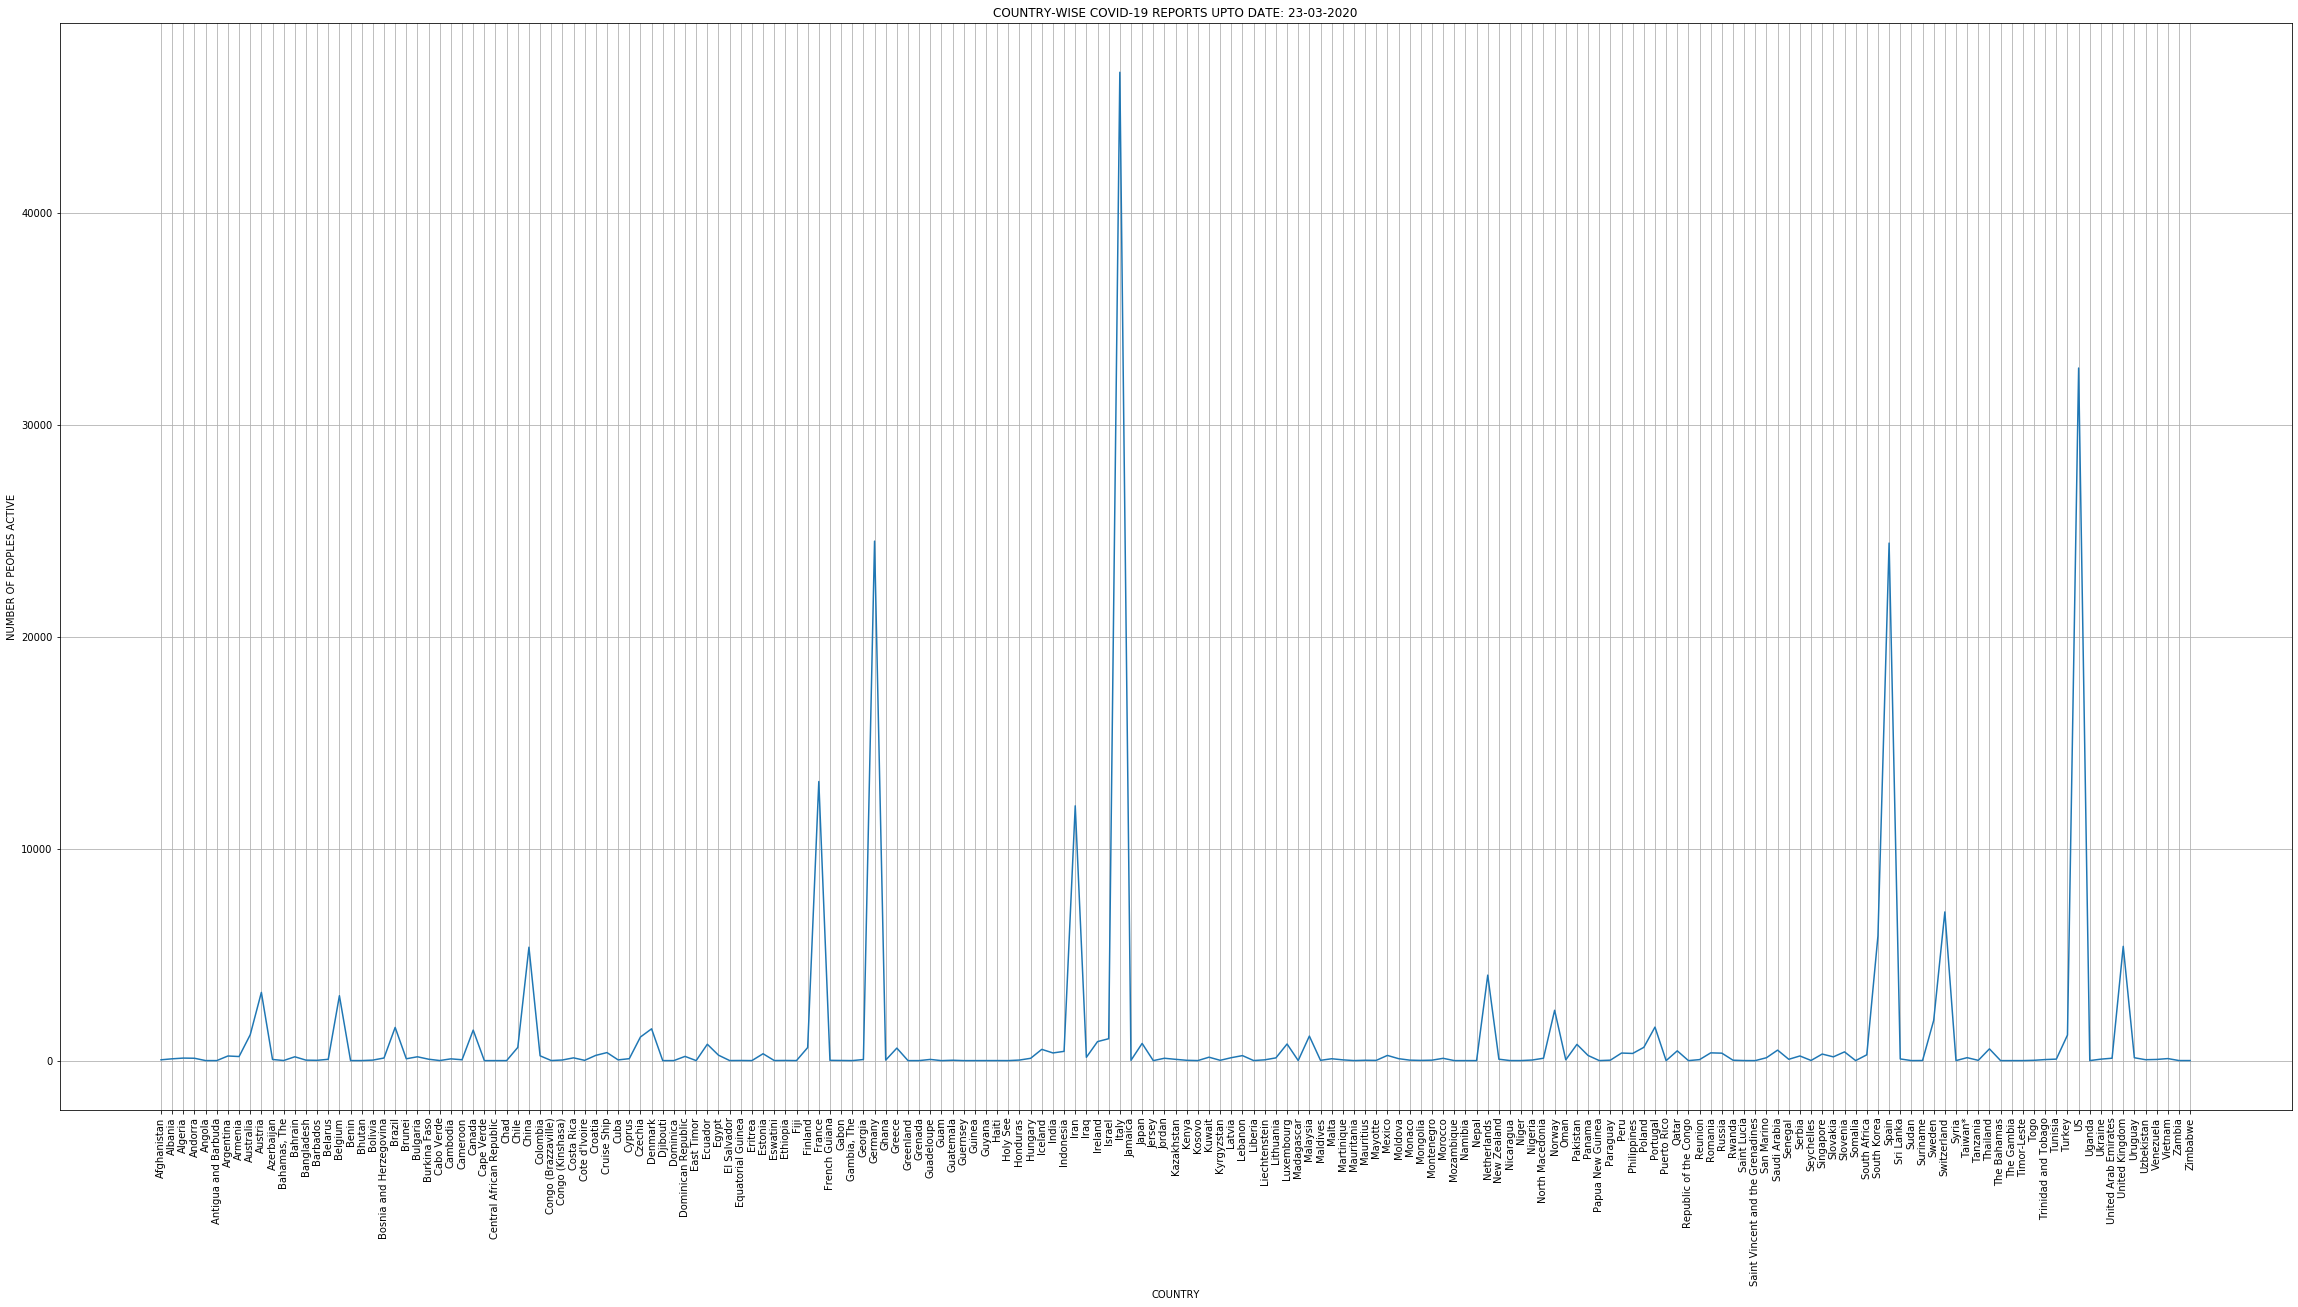

In [22]:
plt.figure(figsize = (40, 20))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLES ACTIVE')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(active, label = 'ACTIVE')

plt.grid()

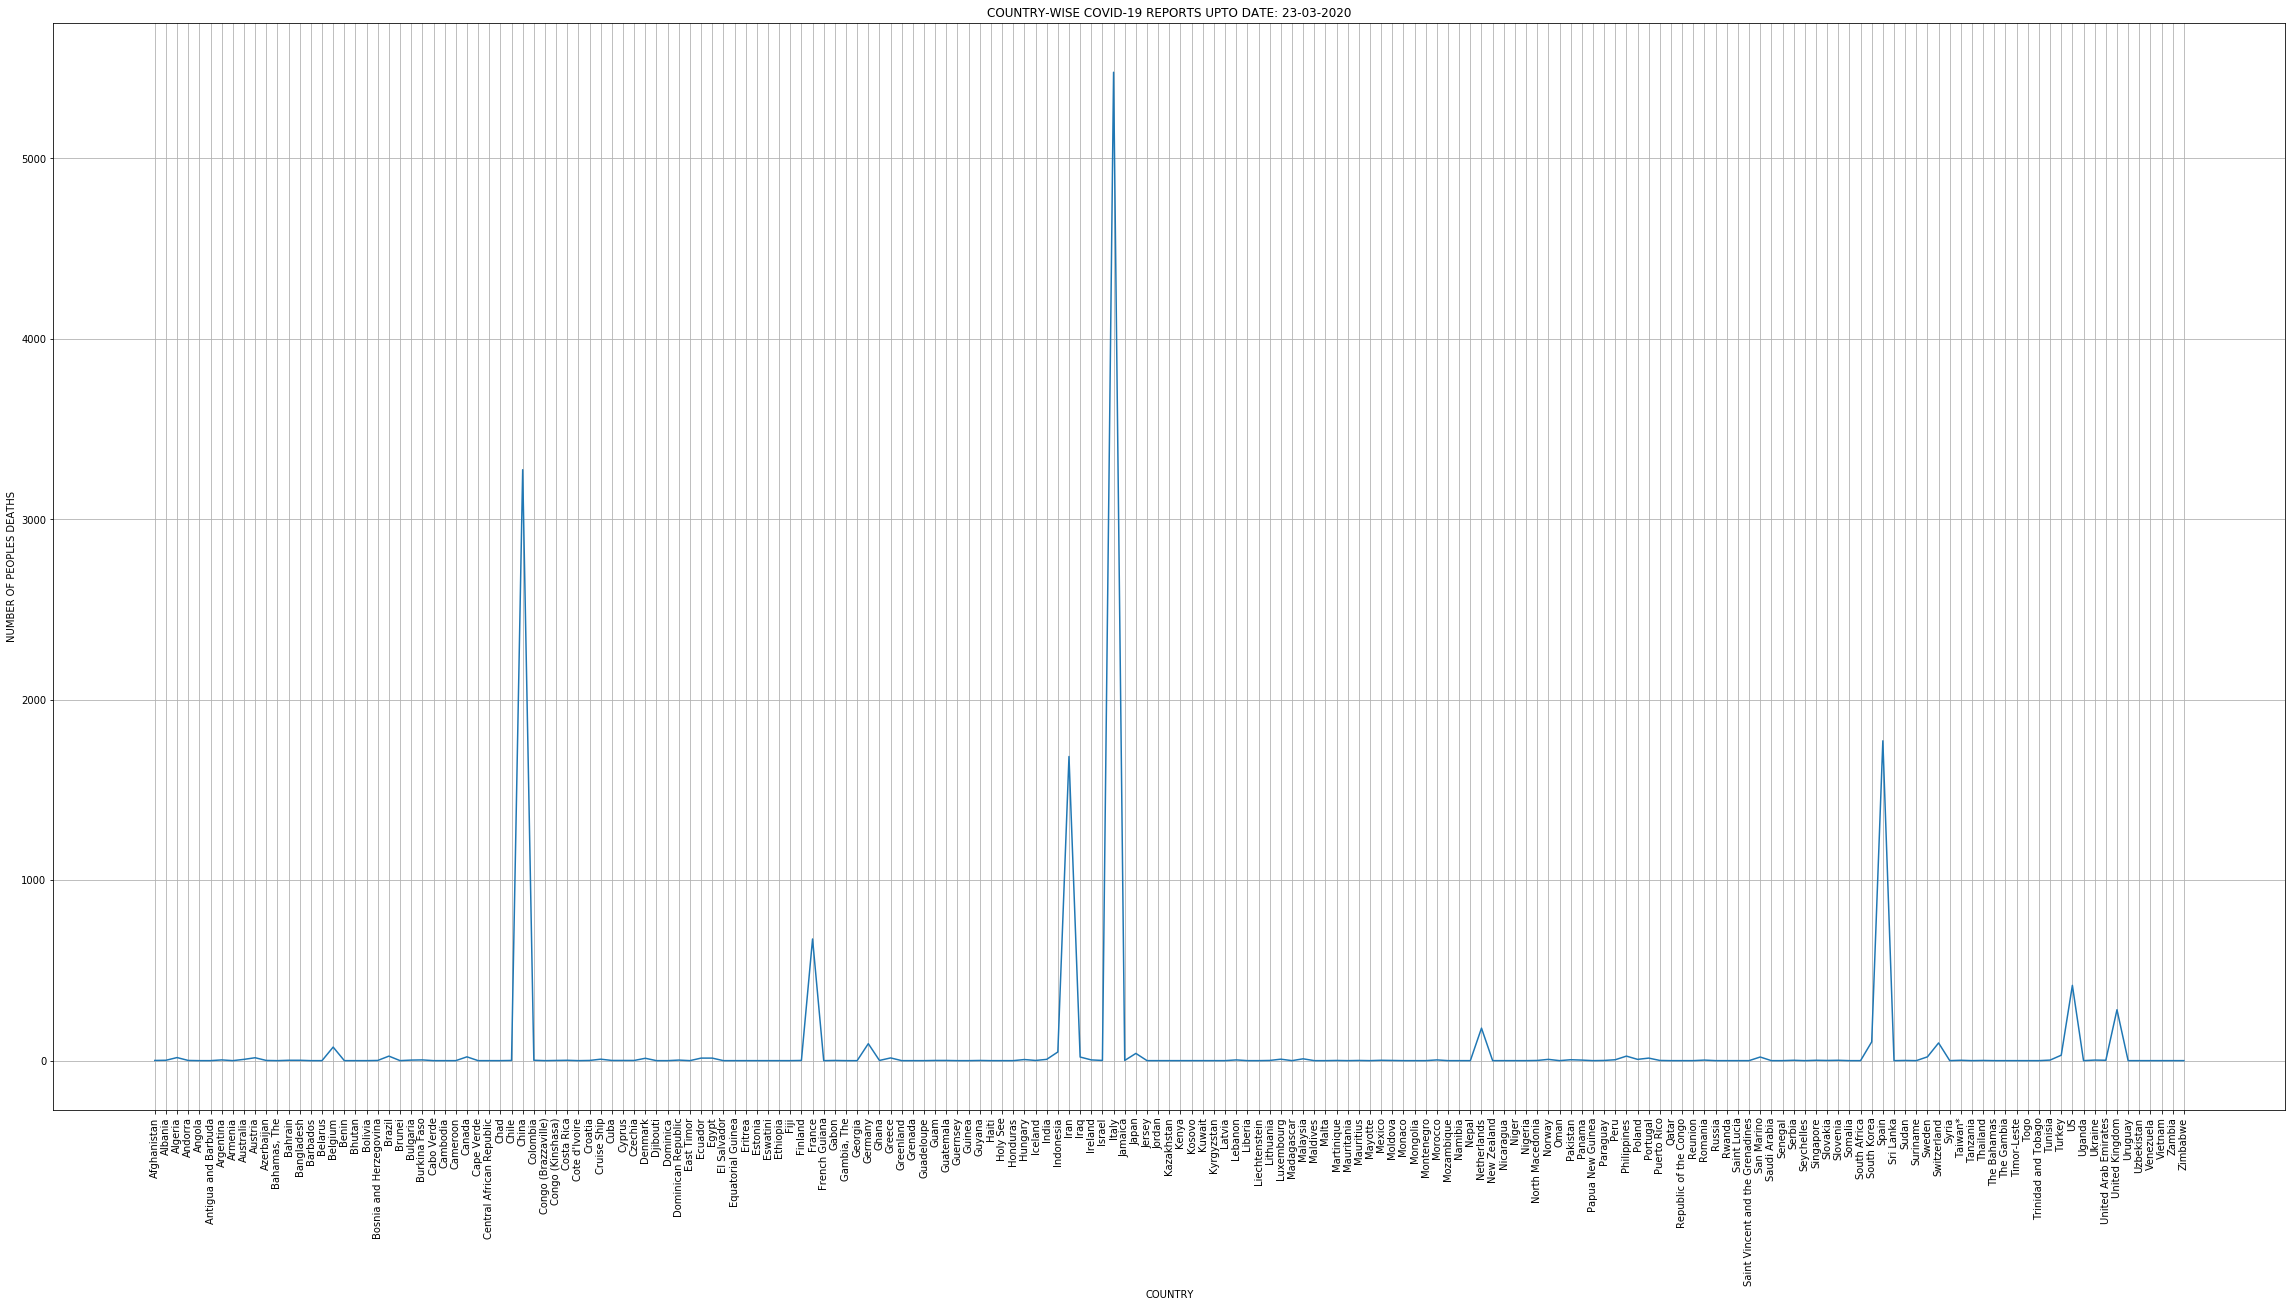

In [23]:
plt.figure(figsize = (40, 20))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLES DEATHS')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(deaths, label = 'DEATHS')

plt.grid()

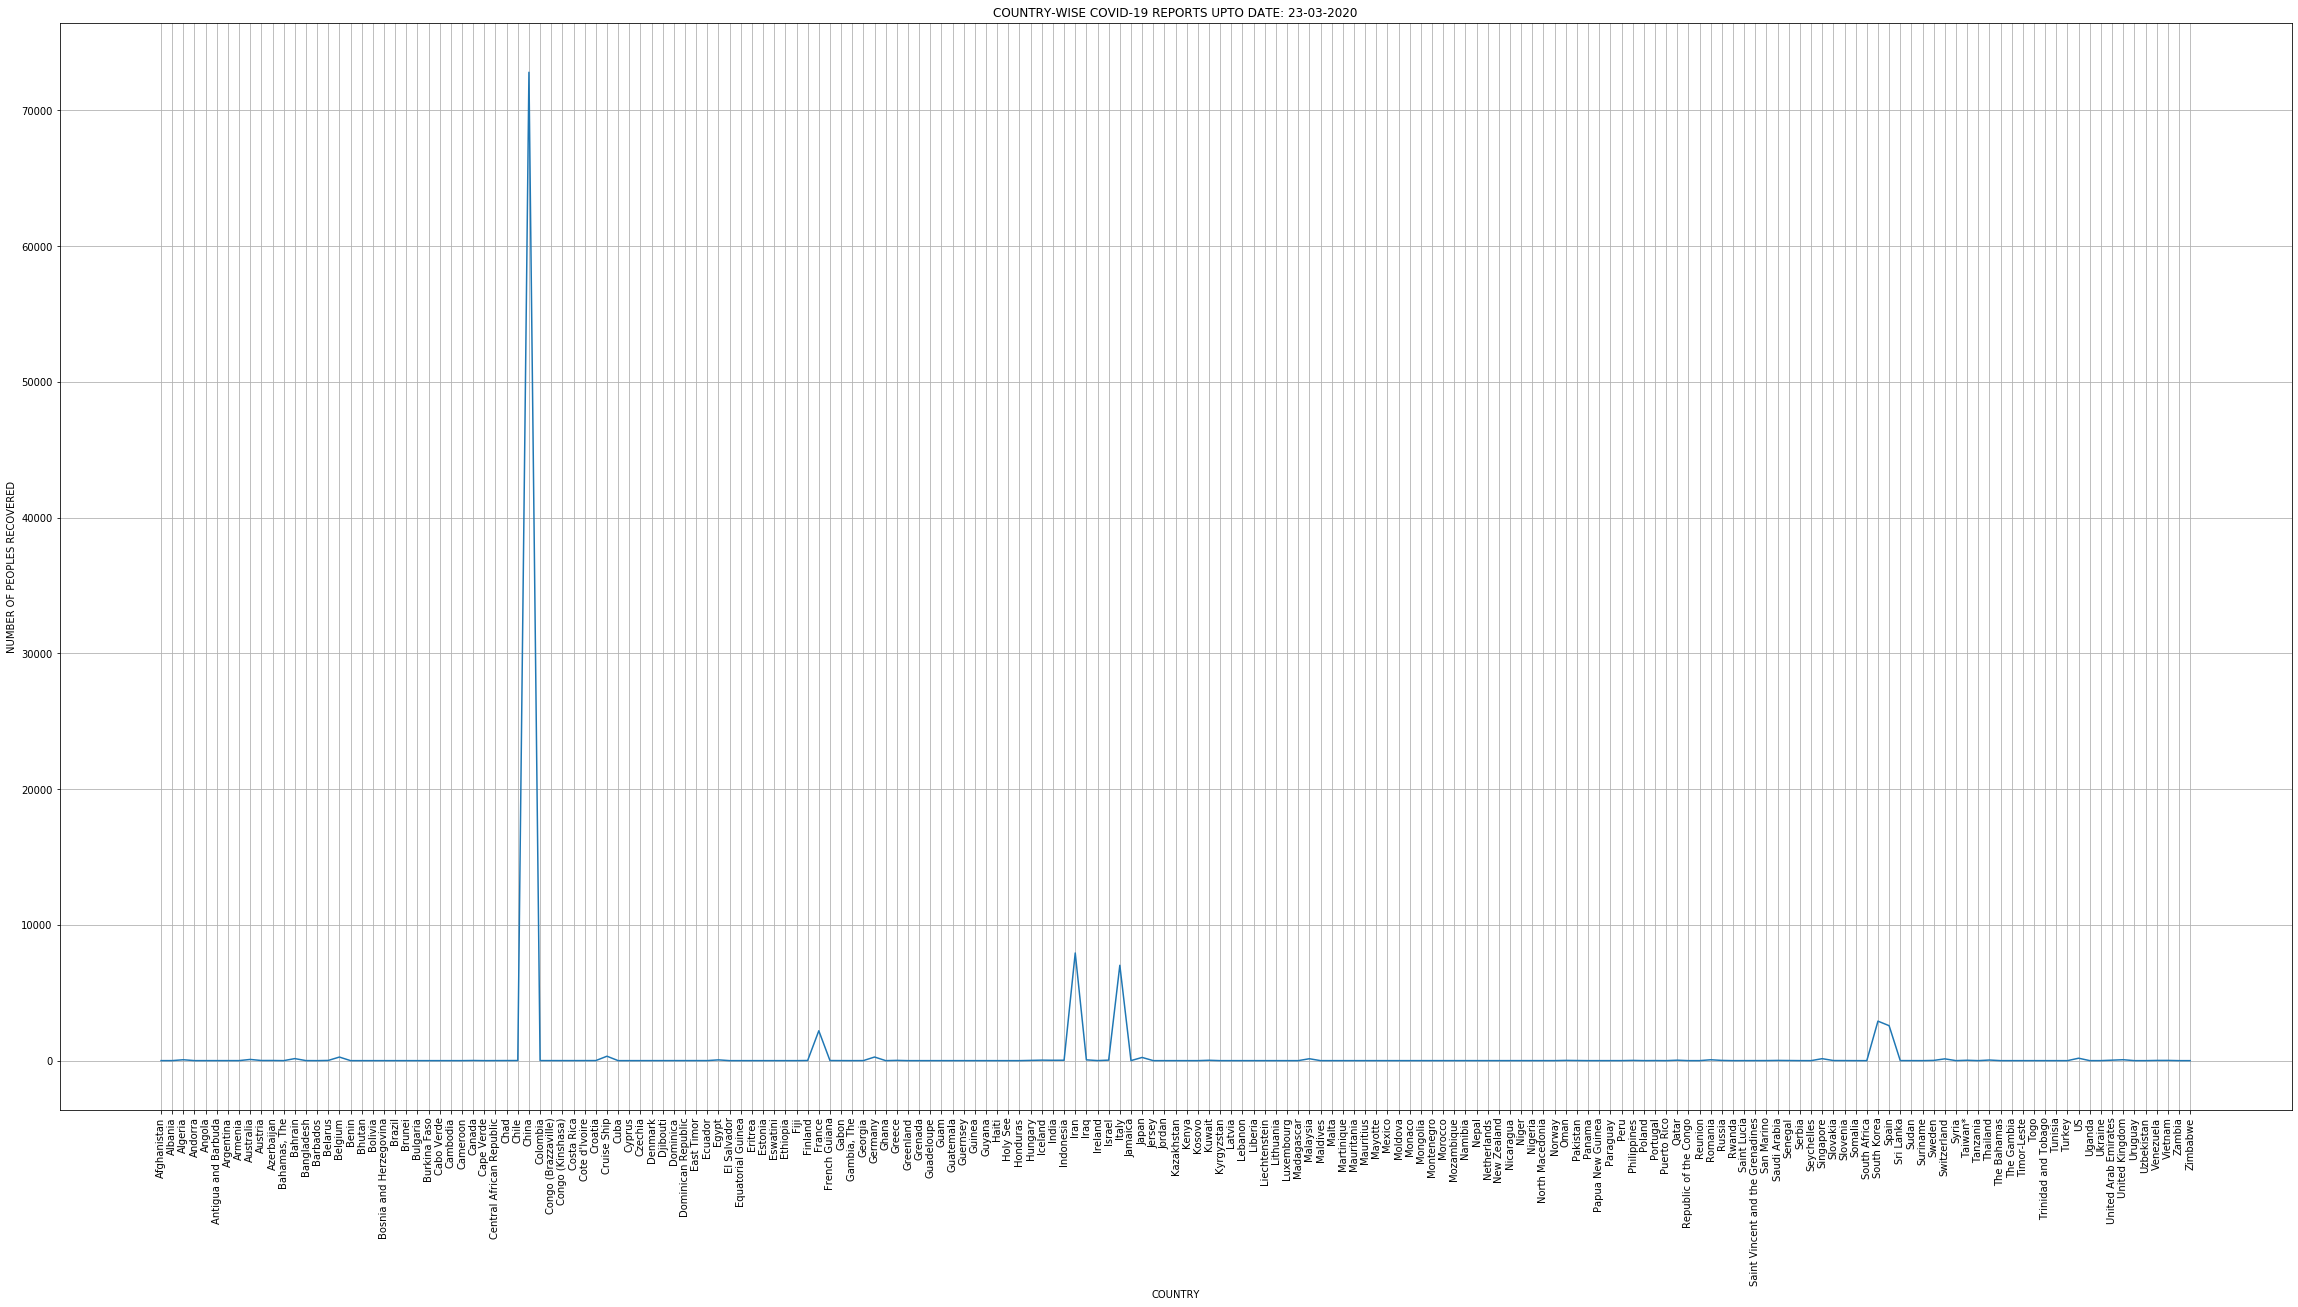

In [24]:
plt.figure(figsize = (40, 20))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLES RECOVERED')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(recovered, label = 'RECOVERED')

plt.grid()

In [25]:
df_sliced = df_ordered[0:43]
df_sliced.shape

(43, 5)

In [26]:
df_sliced.tail()

Country/Region  Confirmed  Deaths  Recovered  Active
38          Qatar      494.0     0.0       33.0   461.0
39      Singapore      455.0     2.0      144.0   309.0
40        Romania      433.0     3.0       64.0   366.0
41       Slovenia      414.0     2.0        0.0   412.0
42          India      396.0     7.0       27.0   362.0

In [27]:
grp_sliced = df_sliced.groupby('Country/Region')
active_s = grp_sliced['Active'].agg(np.sum)
deaths_s = grp_sliced['Deaths'].agg(np.sum)
recovered_s = grp_sliced['Recovered'].agg(np.sum)

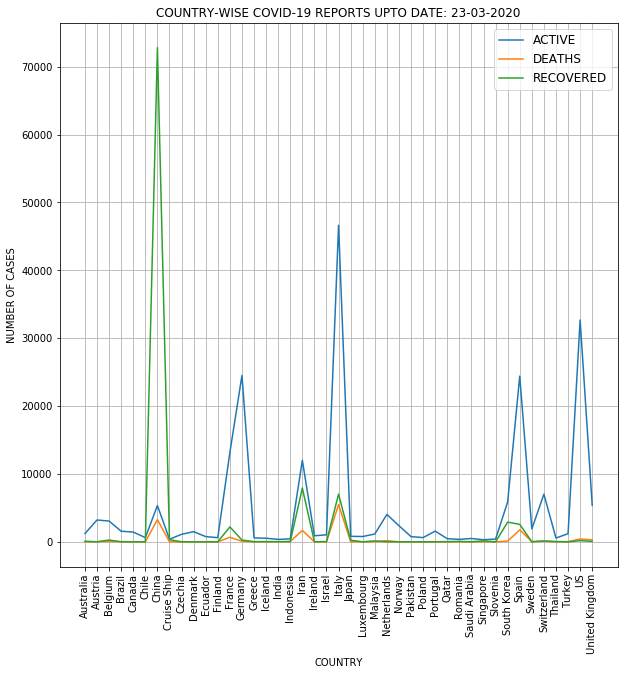

In [28]:
plt.figure(figsize = (10, 10))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF CASES')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(active_s, label = 'ACTIVE')
plt.plot(deaths_s, label = 'DEATHS')
plt.plot(recovered_s, label = 'RECOVERED')

plt.legend(loc = 'best', fontsize = 'large')
plt.grid()

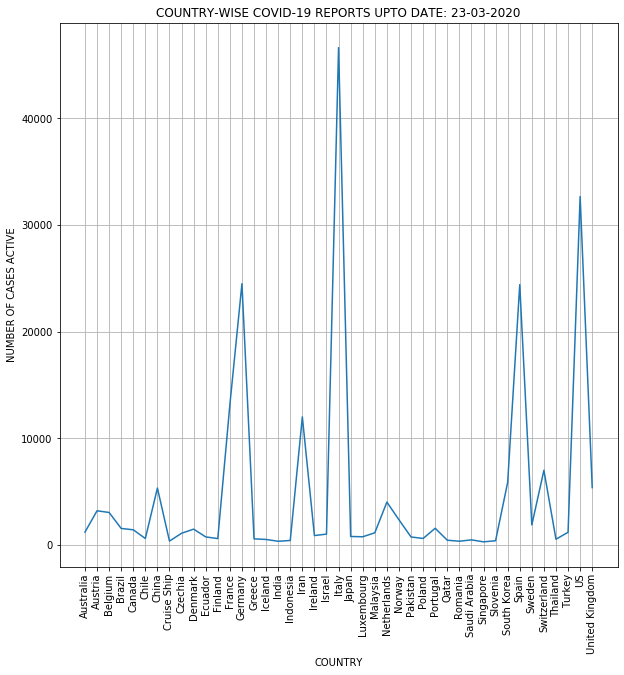

In [29]:
plt.figure(figsize = (10, 10))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF CASES ACTIVE')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(active_s, label = 'ACTIVE')

plt.grid()

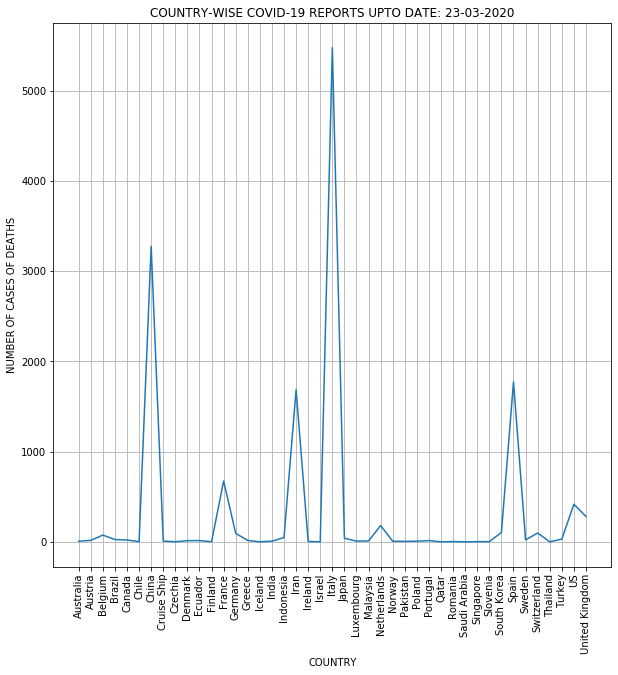

In [30]:
plt.figure(figsize = (10, 10))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF CASES OF DEATHS')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(deaths_s, label = 'DEATHS')

plt.grid()

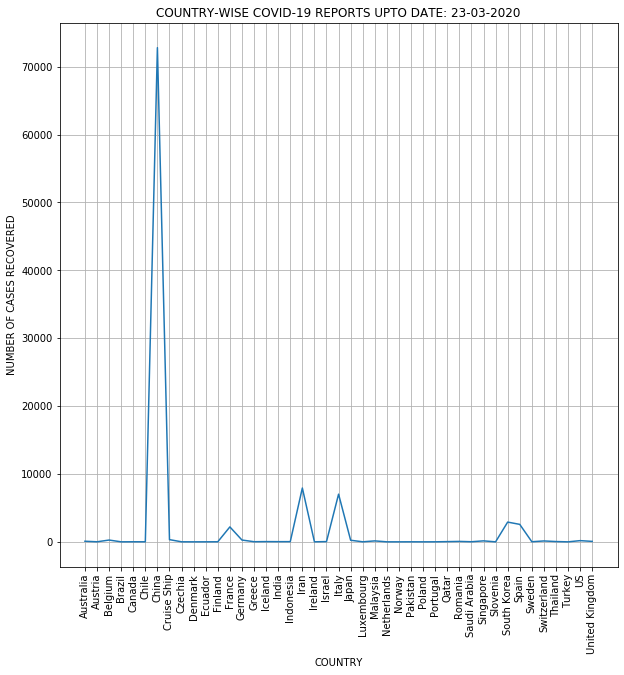

In [31]:
plt.figure(figsize = (10, 10))

plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF CASES RECOVERED')
plt.title('COUNTRY-WISE COVID-19 REPORTS UPTO DATE: 23-03-2020')
plt.xticks(rotation = 90)

plt.plot(recovered_s, label = 'RECOVERED')

plt.grid()

In [32]:
df.head()

index Country/Region       Date  Confirmed  Deaths  Recovered  Active
0  18910       Thailand 2020-03-23      599.0     1.0       44.0   554.0
1  18911          Japan 2020-03-23     1086.0    40.0      235.0   811.0
2  18912      Singapore 2020-03-23      455.0     2.0      144.0   309.0
3  18913          Nepal 2020-03-23        2.0     0.0        1.0     1.0
4  18914       Malaysia 2020-03-23     1306.0    10.0      139.0  1157.0

### Countries with zero cases recovered

In [33]:
zero_rec = df_ordered[df_ordered['Recovered'] == 0].reset_index(drop = True)
zero_rec.style.background_gradient(cmap = 'Reds')

## PIE CHARTS

Text(0.5, 1.0, 'Death Cases')

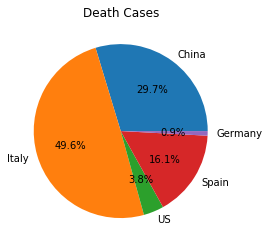

In [34]:
df_new = df_ordered[0:5]
plt.pie(df_new['Deaths'], labels = df_new['Country/Region'], autopct='%1.1f%%')
plt.title('Death Cases')

Text(0.5, 1.0, 'Active Cases')

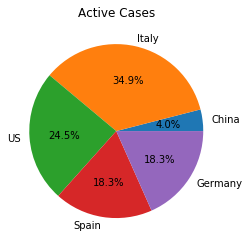

In [35]:
plt.pie(df_new['Active'], labels = df_new['Country/Region'], autopct = '%1.1f%%')
plt.title('Active Cases')

Text(0.5, 1.0, 'Recovered Cases')

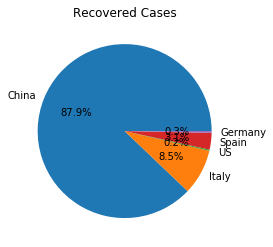

In [36]:
plt.pie(df_new['Recovered'], labels = df_new['Country/Region'], autopct = '%1.1f%%')
plt.title('Recovered Cases')

In [37]:
df_new = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'])
df_new.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [38]:
df_new['Active'] = df_new['Confirmed'] - df_new['Deaths'] - df_new['Recovered']

In [39]:
df_new = df_new[df_new['Date'] == max(df_new['Date'])].reset_index(drop = True)
df_new.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-03-23      599.0   
1            NaN          Japan  36.0000  138.0000 2020-03-23     1086.0   
2            NaN      Singapore   1.2833  103.8333 2020-03-23      455.0   
3            NaN          Nepal  28.1667   84.2500 2020-03-23        2.0   
4            NaN       Malaysia   2.5000  112.5000 2020-03-23     1306.0   

   Deaths  Recovered  Active  
0     1.0       44.0   554.0  
1    40.0      235.0   811.0  
2     2.0      144.0   309.0  
3     0.0        1.0     1.0  
4    10.0      139.0  1157.0

### Analysis by States/Provinces

In [40]:
df_china = df_new[df_new['Country/Region'] == 'China'][['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'Active']].reset_index(drop = True)
df_china_ordered = df_china.sort_values(by = 'Confirmed', ascending = False)
df_china_ordered.style.background_gradient(cmap = 'Reds')

In [46]:
df_uk = df_new[df_new['Country/Region'] == 'United Kingdom'][['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'Active']].reset_index(drop = True)
df_uk_ordered = df_uk.sort_values(by = 'Confirmed', ascending = False).reset_index(drop = True)
df_uk_ordered.style.background_gradient(cmap = 'Reds')

In [48]:
df_india = pd.read_csv('covid_19_india.csv', parse_dates = ['Date'])
df_india.head()

Sno       Date State/UnionTerritory  ConfirmedIndianNational  \
0    1 2020-01-30               Kerala                        1   
1    2 2020-01-31               Kerala                        1   
2    3 2020-01-02               Kerala                        2   
3    4 2020-02-02               Kerala                        3   
4    5 2020-03-02               Kerala                        3   

   ConfirmedForeignNational  Cured  Deaths  
0                         0      0       0  
1                         0      0       0  
2                         0      0       0  
3                         0      0       0  
4                         0      0       0

In [49]:
df_india = df_india[df_india['Date'] == max(df_india['Date'])].reset_index(drop = True)
df_india.head()

Sno       Date State/UnionTerritory  ConfirmedIndianNational  \
0  110 2020-12-03                Delhi                        6   
1  111 2020-12-03              Haryana                        0   
2  112 2020-12-03               Kerala                       17   
3  113 2020-12-03            Rajasthan                        1   
4  114 2020-12-03            Telengana                        1   

   ConfirmedForeignNational  Cured  Deaths  
0                         0      0       0  
1                        14      0       0  
2                         0      3       0  
3                         2      0       0  
4                         0      0       0

In [56]:
df_india_ordered = df_india.sort_values(by = 'ConfirmedIndianNational', ascending = False).reset_index(drop = True)
df_india_ordered.style.background_gradient(cmap = 'Reds')

In [57]:
group = df_india_ordered.groupby('State/UnionTerritory')
confirmedIndian = group['ConfirmedIndianNational'].agg(np.sum)
cured = group['Cured'].agg(np.sum)
death = group['Deaths'].agg(np.sum)

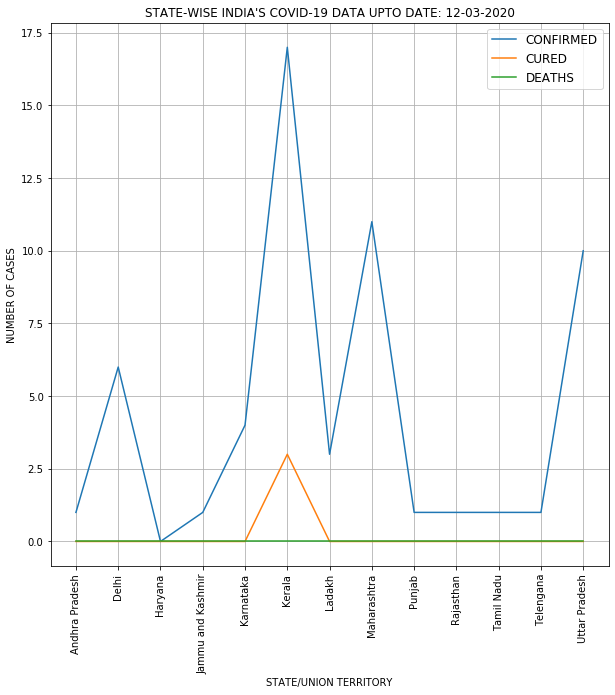

In [58]:
plt.figure(figsize = (10, 10))

plt.xlabel('STATE/UNION TERRITORY')
plt.ylabel('NUMBER OF CASES')
plt.title("STATE-WISE INDIA'S COVID-19 DATA UPTO DATE: 12-03-2020")
plt.xticks(rotation = 90)

plt.plot(confirmedIndian, label = 'CONFIRMED')
plt.plot(cured, label = 'CURED')
plt.plot(death, label = 'DEATHS')

plt.legend(loc = 'best', fontsize = 'large')
plt.grid()

## ANALYSIS BY MAPS

In [66]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df_new[['Province/State']] = df_new[['Province/State']].fillna('')
df_new[cases] = df_new[cases].fillna(0)

In [67]:
# World wide

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(df_new)):
    folium.Circle(
        location=[df_new.iloc[i]['Lat'], df_new.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(df_new.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(df_new.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(df_new.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(df_new.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(df_new.iloc[i]['Recovered']),
        radius=int(df_new.iloc[i]['Confirmed'])**1.1).add_to(m)
m

In [69]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Confirmed

fig = px.choropleth(df_grouped, locations="Country/Region", 
                    locationmode='country names', color=np.log(df_grouped["Confirmed"]), 
                    hover_name="Country/Region", hover_data=['Confirmed'],
                    color_continuous_scale="Sunsetdark", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()